# 8장 자연어 처리 시작하기

In [5]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


# 8-2. 한글 자연어 처리 기초

In [6]:
from konlpy.tag import Kkma
kkma = Kkma()

In [7]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [8]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [9]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [10]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [11]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [12]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [13]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [14]:
from konlpy.tag import Twitter
t = Twitter()

C:\Users\sundooedu\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [15]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [16]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [17]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

# 8-3. 워드 클라우드

In [18]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [19]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [20]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

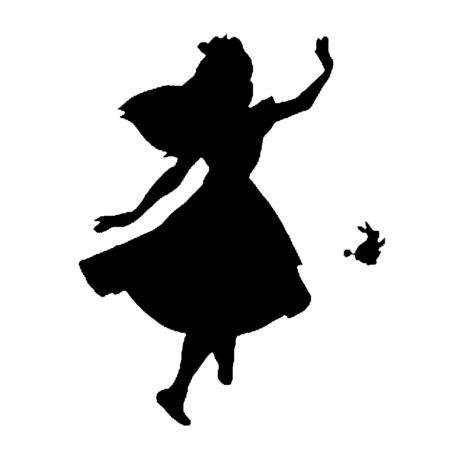

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

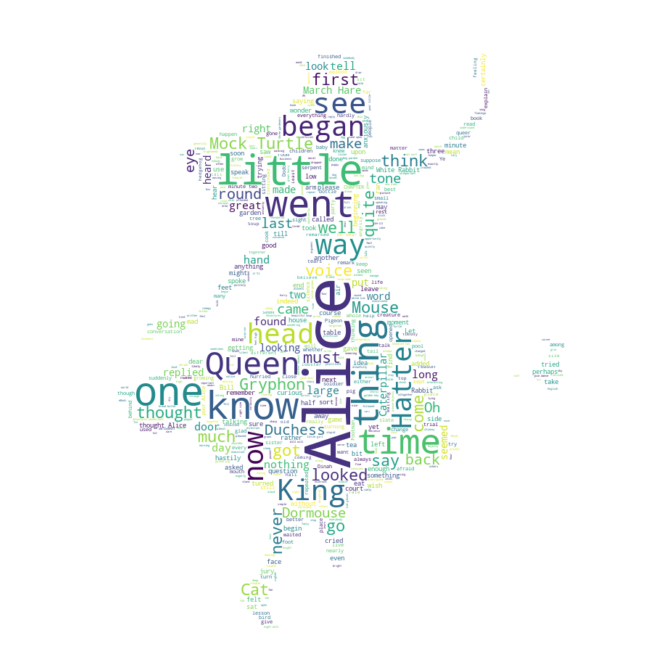

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

In [25]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [26]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [27]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

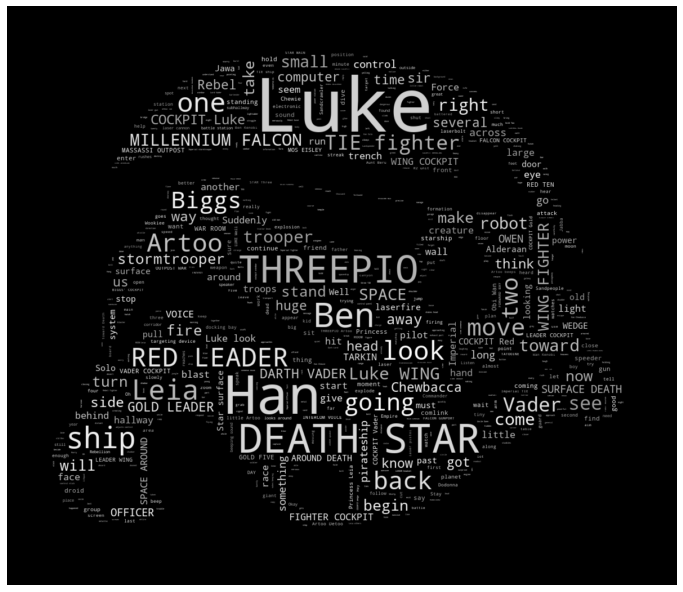

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

# 8-4. 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [29]:
import nltk

In [30]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [31]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [32]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

C:\Users\sundooedu\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [33]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [34]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()  

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

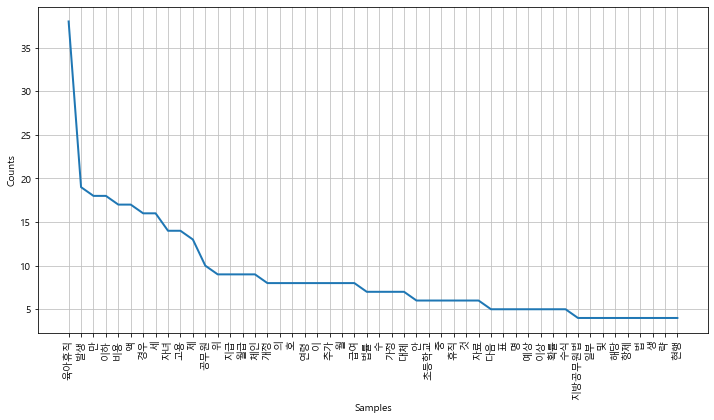

In [35]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [36]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

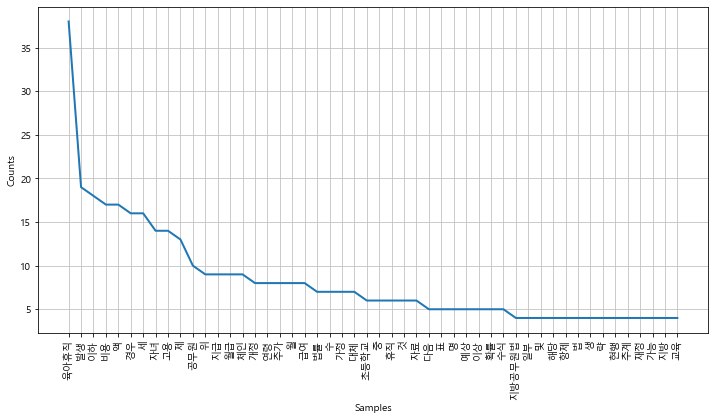

In [37]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [38]:
ko.count('초등학교')

6

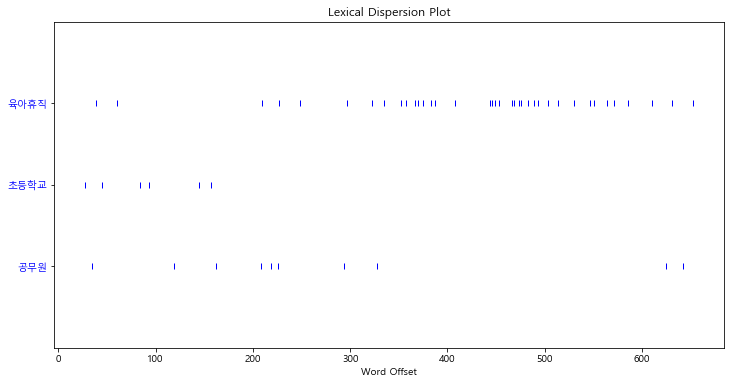

In [39]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [40]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [41]:
print('; '.join(ko.collocation_list()))

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


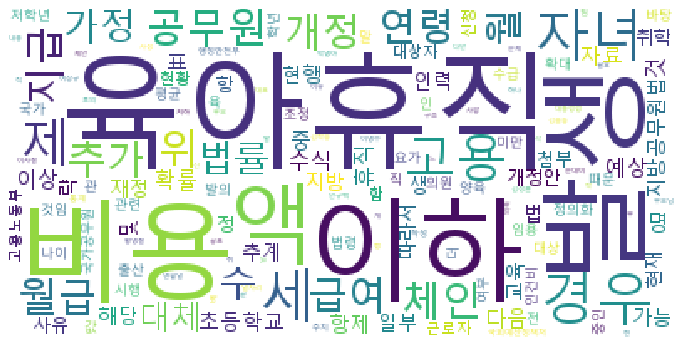

In [42]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 8-5. Naive Bayes Classifier의 이해 - 영문

In [43]:
from nltk.tokenize import word_tokenize
import nltk

In [44]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [45]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [46]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'me': False,
   'i': True,
   'hate': False,
   'like': True,
   'you': True,
   'her': False},
  'pos'),
 ({'me': False,
   'i': True,
   'hate': True,
   'like': False,
   'you': True,
   'her': False},
  'neg'),
 ({'me': True,
   'i': False,
   'hate': False,
   'like': True,
   'you': True,
   'her': False},
  'neg'),
 ({'me': False,
   'i': True,
   'hate': False,
   'like': True,
   'you': False,
   'her': True},
  'pos')]

In [47]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0


In [48]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower()))
                      for word in all_words}
test_sent_features

{'me': False,
 'i': True,
 'hate': False,
 'like': True,
 'you': False,
 'her': False}

In [49]:
classifier.classify(test_sent_features)

'pos'

# 8-6. Naive Bayes Classifier의 이해 - 한글

In [50]:
from konlpy.tag import Twitter

In [51]:
pos_tagger = Twitter()

In [52]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [53]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [54]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'메리는': False,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '지루해': False,
   '메리랑': False,
   '고양이도': False,
   '난': False,
   '메리가': True,
   '놀거야': False,
   '좋아': True},
  'pos'),
 ({'메리는': False,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '지루해': False,
   '메리랑': False,
   '고양이도': True,
   '난': False,
   '메리가': False,
   '놀거야': False,
   '좋아': True},
  'pos'),
 ({'메리는': False,
   '수업이': True,
   '이쁜': False,
   '고양이야': False,
   '마치고': False,
   '지루해': True,
   '메리랑': False,
   '고양이도': False,
   '난': True,
   '메리가': False,
   '놀거야': False,
   '좋아': False},
  'neg'),
 ({'메리는': True,
   '수업이': False,
   '이쁜': True,
   '고양이야': True,
   '마치고': False,
   '지루해': False,
   '메리랑': False,
   '고양이도': False,
   '난': False,
   '메리가': False,
   '놀거야': False,
   '좋아': False},
  'pos'),
 ({'메리는': False,
   '수업이': False,
   '이쁜': False,
   '고양이야': False,
   '마치고': True,
   '지루해': False,
   '메리랑': True,
   '고양이도': False,
   '난': True,
   '메리가':

In [55]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0


In [56]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [57]:
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower()))
                                    for word in all_words}
test_sent_features

{'메리는': False,
 '수업이': True,
 '이쁜': False,
 '고양이야': False,
 '마치고': False,
 '지루해': False,
 '메리랑': True,
 '고양이도': False,
 '난': True,
 '메리가': False,
 '놀거야': True,
 '좋아': False}

In [58]:
classifier.classify(test_sent_features)

'neg'

In [59]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [60]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [61]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [62]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [63]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [64]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [65]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [66]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [67]:
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0


In [68]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [69]:
classifier.classify(test_sent_features)

'pos'

# 8-7. 문장의 유사도 측정

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
vectorizer = CountVectorizer(min_df = 1)

In [72]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [73]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [74]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [75]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [76]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [77]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [78]:
# 벡터 a의 길이는 놈(norm) ∥a∥으로 정의
# norm() 명령으로 벡터의 길이
import numpy as np
a = np.array([1,2])
np.linalg.norm(a)

2.23606797749979

In [79]:
# 기존에 있던 문장과 
# 새로 들어온 문장 거리가 누가 더 가까운지 측정
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [80]:
from konlpy.tag import Twitter
t = Twitter()

In [81]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [82]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [83]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [84]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [85]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [86]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [87]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [88]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [89]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [90]:
from konlpy.tag import Twitter
t = Twitter()

In [91]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [92]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [93]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [94]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [95]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [96]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [97]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [98]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [99]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [100]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [101]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [102]:
# feature를 구하고 새로운 문장과 기존의 문장을 
# 벡터로 거리를 구하여 거리가 가장 가까운 문장을 
# 비교하여 동일한 의미의 문장을 비교하고 찾아낸다.
# 다만 주어진 문장이 4개 뿐이라 새로운 문장과 비교시 의미가 
# 달라질 수는 있다.

for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


###  텍스트를 벡터화
* 문장의 유사도를 계싼
* 머신러닝 모델의 입력값으로 사용
#### 벡터화 단점
* sparisity- 희소행렬(sparse matrix) - ex.백만개
* 계산량 많아지고
* 메모리를 많이 차지한다. 

In [103]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [104]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [105]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [106]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [107]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [108]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [110]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features
# 4행 20열

(4, 20)

In [111]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [112]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [113]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [114]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


# 8-8. 여자 친구 선물 고르기

In [115]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [116]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [117]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여친 생일선물   크리스마스 여친선물   stretch angels   여친 크리스마스 선물   수에르떼 석류     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여친선물..급해용!   2019.08.31.   집에 좀 드리고 남은여유로 여친선물을 하나 사줄까 합니다. 인터넷으로 여친선물들... 추억이 될만한 여친선물로 뭐가 좋을까여? 기발하거나 독특한것이면 좋을것같아여!   답변 안녕하세요♥ 여친 선물 찾고 계시는 군요. ^^ 함께 찍은 사진과 진심 어린 메시지가 담긴 포토머그컵이나 매직머그컵 어떠세요? 고객분들의 만족도도 매우 높은 제품이라...    닉네임choo****   ',
 '  질문  크리스마스 여친 선물 추천해주세요   2019.12.02.   20대 여친 선물 추천이요 광고x 이미지 2장 이내로 부탁드려요   답변 여자친구 크리스마스 선물로 딱인 제품 추천드려요!! http://bit.ly/2XYoUnk [크리스마스 산타의 특별한 선물]눈내리는 신비로운 스노우볼 주얼리! 크리스마스의 환상과...    닉네임hjni****   ',
 '  질문  베트남에서 여친 선물   2019.08.14.   이번주 주말에 베트남 다낭에 여행가는데 대학생 여친한테 선물 줄꺼 추천해주세요!! 부담되지 않게 5만원 이하로 부탁해요!!   답변 라탄 가방 라탄 장식품 커피 노니 환 노니비누 베트남 과자 ^^ 한시장에서 파는 라탄 가방 싸용~ 2~3개 사도 될껍니다    닉네임유니   ',
 '  질문  다이어트하는 여친선물로 가장 특별한것은?   2019.11.14.   다이어트하는 여친선물로 가장 특별한것은? 

In [118]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0)

In [119]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구목걸이   스킨케어   여자30대선물   에센스추천   여자친구선물뷰티디바이스   선물   여자친구생일선물   여자근력운동   여자친구100일선물   10대여자친구선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여자친구선물 기념일에 주기 좋은걸로!   2019.12.04.   여자친구선물을 해주고 싶은데…물어보니 갖고싶은게 없다고해요ㅠㅠ 몰래 여자친구선물 사서 주려고 하는데 어떤게 좋을까요? 여자친구가 좋아할만한 여자친구선물...   답변 안녕하세요, 여자친구선물 알아보시나 봅니다. 여자친구선물을 구매하실 때에는... 없다고 한다면 실용적인 여자친구선물을 하시길 바라며, 여자친구선물 답변 마칩니다.    닉네임chwu****   ',
 '  질문  여자친구 선물 추천 바래요   2019.12.06.   여자친구 선물 해주려고 하는데 어떤 게 괜찮을지 몰라서요 화장품을 해줄까... 그러는데 여자친구 선물로 괜찮은 거 추천 좀 해주세요 화장품도 괜찮고 화장품이 아니더라도...   답변 토닥토닥워터 너의이름은장미를 추천해요 장미와 건조레몬, 딸기 등이 블랜딩 되어 있어 상큼하고 맛있게 먹을수 있어요 간편하게 보틀에 우려 마시면 되고 낱봉으로 되어...    닉네임leti****   ',
 '  질문  여자친구 선물 가방 50~60 정도로   2019.11.22.   여자친구 선물 가방 50~60 정도로 추천좀 부탁드려요   답변 안녕하세요. 필웨이 공식 지식인입니다. 여자친구분 선물로 가방 제품을 고려하고 계신데, 말씀하신 50만 원~60만 원대의 제품을 선정하여 추천드려볼게요. <지방시...   

In [120]:
len(present_candi_text)

1300

In [121]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

C:\Users\sundooedu\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [122]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [123]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '30',
 '대',
 '선물',
 '에센스',
 '추천',
 '여자친구',
 '선물',
 '뷰티',
 '디바이스',
 '선물',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '10',
 '대',
 '여자친구',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '여자친구',
 '선물',
 '기념일',
 '에',
 '주기',
 '좋은걸',
 '로',
 '!',
 '2019.12',
 '.',
 '04',
 '.',
 '여자친구',
 '선물',
 '을',
 '해주고',
 '싶은데',
 '…',
 '물어보니',
 '갖고',
 '싶은게',
 '없다',
 '고해',
 '요',
 'ㅠㅠ',
 '몰래',
 '여자친구',
 '선물',
 '사서',
 '주',
 '려고',
 '하는데',
 '어떤게',
 '좋을까

In [124]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

90000
415


In [125]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 6100),
 ('여자친구', 5700),
 ('.', 3500),
 ('...', 2800),
 ('로', 1800),
 ('을', 1300),
 ('를', 1100),
 ('추천', 1100),
 ('질문', 1100),
 ('답변', 1100),
 ('가', 1000),
 ('대', 1000),
 ('닉네임', 1000),
 ('거', 900),
 ('화장품', 800),
 ('10', 700),
 ('?', 700),
 ('****', 700),
 ('이', 700),
 ('한', 600),
 ('의', 600),
 ('에', 600),
 ('뭐', 600),
 ('단어', 500),
 ('여자', 500),
 ('뷰티', 500),
 ('요', 500),
 (',', 500),
 ('좀', 500),
 ('은', 500),
 ('너무', 500),
 ('검색', 400),
 ('하는', 400),
 ('해주고', 400),
 ('하는데', 400),
 ('좋을까요', 400),
 ('게', 400),
 ('괜찮은', 400),
 ('하고', 400),
 ('고민', 400),
 ('팩트', 400),
 ('인지', 400),
 ('입력', 300),
 ('때', 300),
 ('합니다', 300),
 ('는', 300),
 ('목걸이', 300),
 ('생일', 300),
 ('기념일', 300),
 ('안녕하세요', 300),
 ('해주려고', 300),
 ('어떤', 300),
 ('해주세요', 300),
 ('도', 300),
 ('가방', 300),
 ('(', 300),
 ('가격', 300),
 ('좋은', 300),
 ('ysl', 300),
 ('제', 300),
 ('위', 300),
 ('걸', 300),
 ('포함', 200),
 ('여러', 200),
 ('하실', 200),
 ('연관검색어', 200),
 ('스킨', 200),
 ('30', 200),
 ('주', 200),
 ('됩니다', 200),
 ('주기'

In [126]:
ko.similar('여자친구')

이쁜


In [127]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 6100),
 ('여자친구', 5700),
 ('추천', 1100),
 ('닉네임', 1000),
 ('화장품', 800),
 ('****', 700),
 ('여자', 500),
 ('뷰티', 500),
 ('너무', 500),
 ('검색', 400),
 ('해주고', 400),
 ('하는데', 400),
 ('좋을까요', 400),
 ('괜찮은', 400),
 ('하고', 400),
 ('고민', 400),
 ('팩트', 400),
 ('인지', 400),
 ('입력', 300),
 ('합니다', 300),
 ('목걸이', 300),
 ('생일', 300),
 ('기념일', 300),
 ('안녕하세요', 300),
 ('해주려고', 300),
 ('해주세요', 300),
 ('가방', 300),
 ('(', 300),
 ('가격', 300),
 ('좋은', 300),
 ('ysl', 300),
 ('위', 300),
 ('걸', 300),
 ('포함', 200),
 ('여러', 200),
 ('하실', 200),
 ('연관검색어', 200),
 ('스킨', 200),
 ('30', 200),
 ('됩니다', 200),
 ('주기', 200),
 ('!', 200),
 ('2019.12', 200),
 ('…', 200),
 ('ㅠㅠ', 200),
 ('바', 200),
 ('래', 200),
 ('괜찮을지', 200),
 ('몰라서요', 200),
 ('해줄까', 200)]

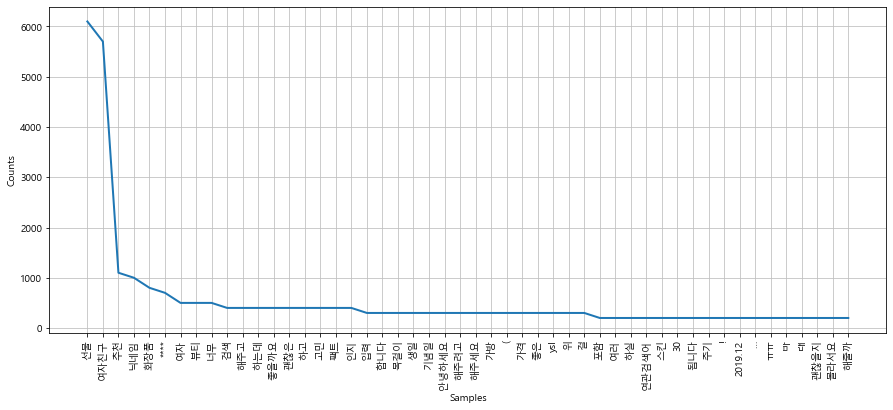

In [128]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [129]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

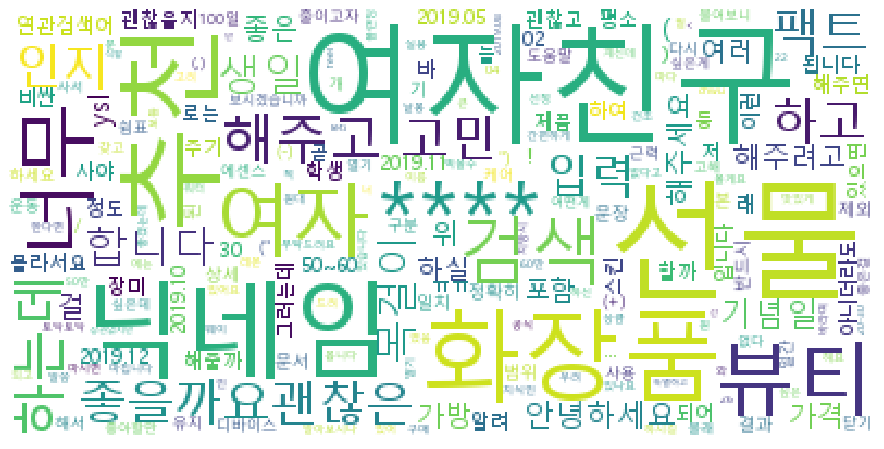

In [130]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [131]:
mask = np.array(Image.open('../data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [132]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

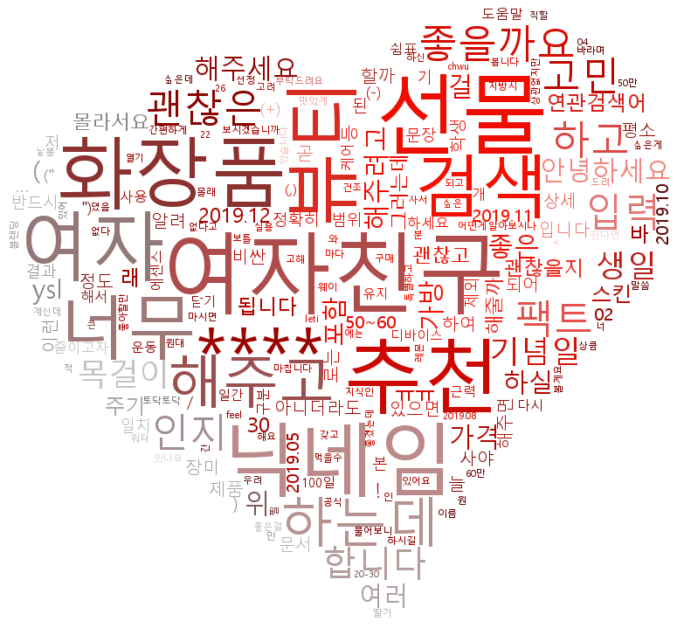

In [133]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [134]:
import gensim
from gensim.models import word2vec

In [135]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

C:\Users\sundooedu\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 

질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 

질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여

질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님

질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다

질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time A

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임

질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 

질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 d

질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handm

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이

질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 

질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여

질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님

질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다

질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time A

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임

질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 

질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 d

질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handm

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이

질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 

질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 토닥토닥 워터 너 이름 장미 추천 하다 장미 건조 레몬 딸기 등 블랜딩 되어다 있다 상큼 맛있다 먹다 있다 간편하다 보틀 우려 말다 되다 낱봉 되어다 닉네임 leti
질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여

질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님

질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한 여자친구 선물 답변 안녕하다 여자친구 선물 알아보다 보다 여자친구 선물 구매 하다 때 없다 하다 실용 적 여자친구 선물 하다 바라다 여자친구 선물 답변 마치다 닉네임 chwu
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다

질문 여자친구 선물 가방 50~60 정도 2019.11 22 여자친구 선물 가방 50~60 정도 추천 좀 부탁드리다 답변 안녕하다 필 웨이 공식 지식인 이다 여자친구 분 선물 가방 제품 고려 계시다 말씀 하다 50만 원 60만 원대 제품 선정 하다 추천 드리다 보다 지방시 닉네임 feel
질문 여자친구 선물 20-30 대다 괜찮다 거 뭐 있다 2019.08 26 안녕하다 여자친구 선물 고민 있다 늘 기념일 싶다 여자친구 선물 이다 좋다 가격 크다 상관없다 특별하다 간 직할 만 그렇다 여자친구 선물 이면 답변 여자친구 선물 이 것 누구 한번 쯤 고민 하다 보다 것 노미 네이션 여자친구 선물 추천 하다 이유 여친 좀 캐 쥬얼 부담 없다 가격 대 여자친구 선물 중 닉네임 뷰티 전문가
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 드리다 저 예전 여자친구 선물 주다 거 너무 또 여자친구 선물 드리다 거 보 부작용 효과 이렇다 게 닉네임 ddna
질문 10 대다 여자친구 선물 뭘 사다 하다 요 2019.06 18 곧 그 친구 생일 다가오다 10 대다 여자친구 선물 뭐 괜찮다 너무 비싸다 않다 좀 괜찮다 10 대다 여자친구 선물 추천 해주다 답변 ㅎㅎ 10 대다 여자친구 선물 뭐 좋다 ㅎㅎ 저 10 대다 여자친구 선물 노아 퓨어 플라워 스킨 로션 10 대다 여자친구 선물 주기 여러 모로 너무 좋다 거 닉네임 k 6 hi
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time A

질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다 닉네임 bo 25
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 학생 여자친구 선물 2019.10 30 여자친구 선물 다가오다 제 학생 너무 비싸다 선물 못 해주다 적당하다 가격 선물 해주다 싶다 목걸이 해주다 목걸이 너무 비싸다 찾다 답변 천 사 트리 캔들 어떻다 https://shopping.naver.com/living/handmade/stores/100466095 밍블 네이버 쇼핑 리빙 윈도 가죽 방향 제 디 퓨저 shopping 닉네임 열정
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 에센스 추천 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 기념일 주기 좋다 것 2019.12 04 여자친구 선물 해주다 싶다 물어보다 갖다 싶다 없다 고해 ㅠㅠ 몰래 여자친구 선물 사서 주 려고 하다 어떻다 좋다 여자친구 좋아하다 한

In [136]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [137]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)
model.save('pres_girl.model')

In [138]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [139]:
model.most_similar(positive=['선물'])

C:\Users\sundooedu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.7540183663368225),
 ('여자', 0.3925790786743164),
 ('없다', 0.3356883227825165),
 ('알아보다', 0.3301999568939209),
 ('좋다', 0.31636571884155273),
 ('주', 0.3003977835178375),
 ('답변', 0.29892921447753906),
 ('상관없다', 0.29612162709236145),
 ('근력', 0.2920931577682495),
 ('질문', 0.2907315194606781)]

In [140]:
model.most_similar(positive=['여자친구'])

C:\Users\sundooedu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.7540183663368225),
 ('좋다', 0.4789484143257141),
 ('생일', 0.3808051347732544),
 ('질문', 0.37628525495529175),
 ('저', 0.3703661262989044),
 ('답변', 0.36077046394348145),
 ('게', 0.3596941828727722),
 ('뭐', 0.3369660973548889),
 ('고민', 0.33306652307510376),
 ('괜찮다', 0.32772886753082275)]

In [150]:
model.most_similar(positive=['목걸이'])

C:\Users\sundooedu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('30', 0.7935881018638611),
 ('못', 0.685516357421875),
 ('사', 0.6785163879394531),
 ('적당하다', 0.6751112937927246),
 ('천', 0.6732217073440552),
 ('트리', 0.6517829895019531),
 ('캔들', 0.64534991979599),
 ('학생', 0.6002663373947144),
 ('케어', 0.5543438196182251),
 ('네이버', 0.543552041053772)]

In [146]:
model.most_similar(positive=['목걸이'],negative=['여자친구'])

C:\Users\sundooedu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('30', 0.4497114419937134),
 ('적당하다', 0.4409872889518738),
 ('트리', 0.4221300482749939),
 ('천', 0.40681350231170654),
 ('사', 0.40641698241233826),
 ('캔들', 0.3845518231391907),
 ('못', 0.3737567067146301),
 ('학생', 0.34044694900512695),
 ('케어', 0.32371747493743896),
 ('https://shopping.naver.com/living/handmade/stores/100466095',
  0.31813621520996094)]